<a href="https://www.kaggle.com/code/fadynabilmofeed/fasttrack-spam-defense-boosting-fasttext?scriptVersionId=178452922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

/bin/bash: is/kaggle/input/imagea: No such file or directory


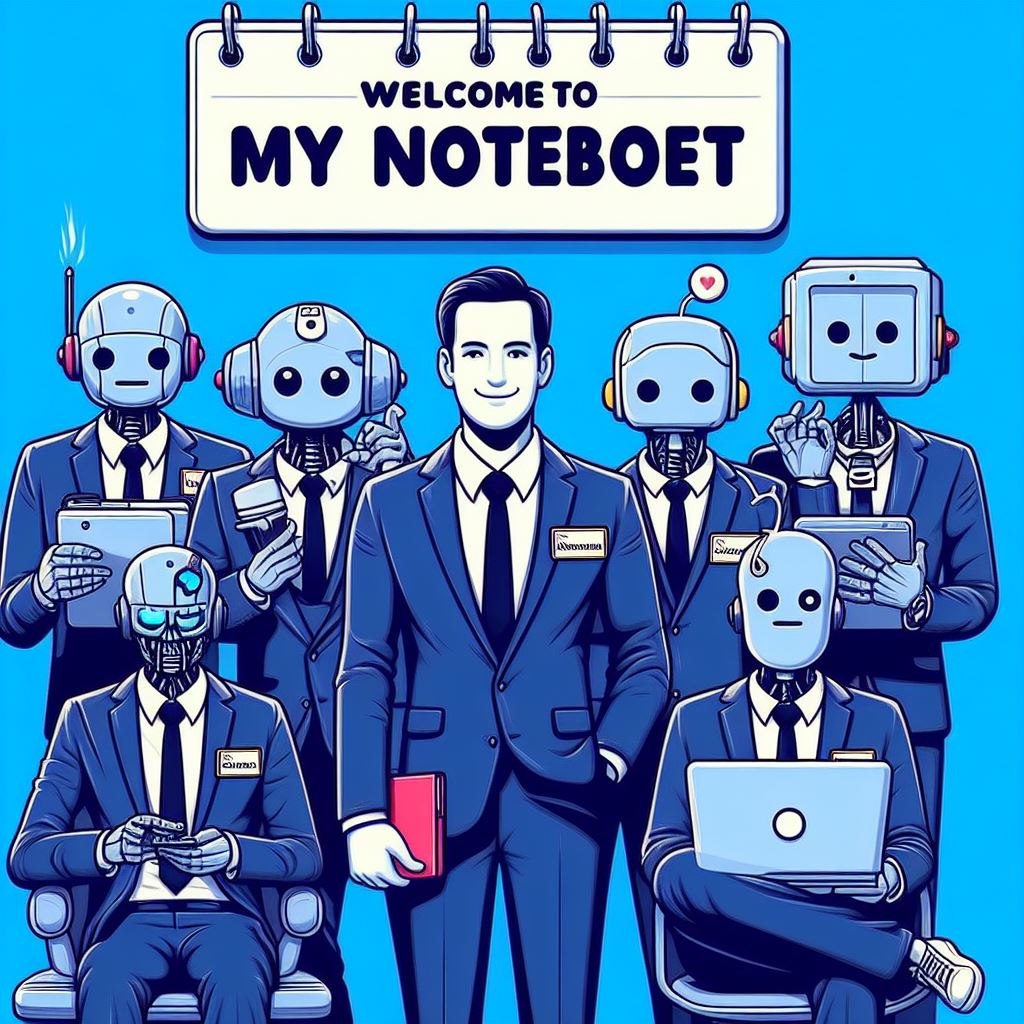

In [1]:
from IPython.display import Image
import os
!is/kaggle/input/imagea
Image('/kaggle/input/imagea/_0710389c-c688-44d2-864f-1377bee9a620.jpg')

# Importing Libraries

In [2]:
# Image
from IPython.display import Image
import os
!is/kaggle/input/imagea

# Numarical Manipulation
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Visual representation of the iterative process progress
from tqdm import tqdm

#Train, test and, modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

# Natural Language Processing (NLP)
import string
string.punctuation
import gensim 
from gensim.models import FastText 
import gensim.downloader as api 
from nltk.stem import PorterStemmer # Word_reduction: base or dictionary form.
import re 
import nltk 
from nltk.corpus import stopwords
stopwords.words('english')
from nltk import sent_tokenize,word_tokenize # Splits text into individual sentences based on punctuation and other linguistic cues.
from gensim.utils import simple_preprocess # Converts the words to lowercase and removes punctuation after tokenizing.


/bin/bash: is/kaggle/input/imagea: No such file or directory


* Downloads the stopwords corpus from NLTK:                                          
stopwords are often removed from text data during preprocessing because   they typically do not carry significant meaning for tasks like text analysis or classification
* 'sent_tokenize' with 'simple_preprocess' combination of tools is commonly used in natural language processing for text preprocessing tasks.









# Data Manipulation

In [3]:
Try_List = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'utf-16', 'utf-32', 'ascii']

# Try to read a CSV file using different encodings until successful.
for enc in Try_List:
    try:
        Data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',
                           sep='\t', encoding=enc)
        print(f"Successful encoding: {enc}")
        break
    except Exception as EXC:
        print(f"Error encoding {enc}: {EXC}")


Error encoding utf-8: 'utf-8' codec can't decode bytes in position 141-142: invalid continuation byte
Successful encoding: latin1


In [4]:
Data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
Data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace = True)
Data.rename(columns={'v1':'target', 'v2':'text'}, inplace= True)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
Data['target'] = label_encoder.fit_transform(Data['target'])

In [7]:
Data.drop_duplicates(keep='first',inplace=True)

# Engineering Data Processing (EDA)

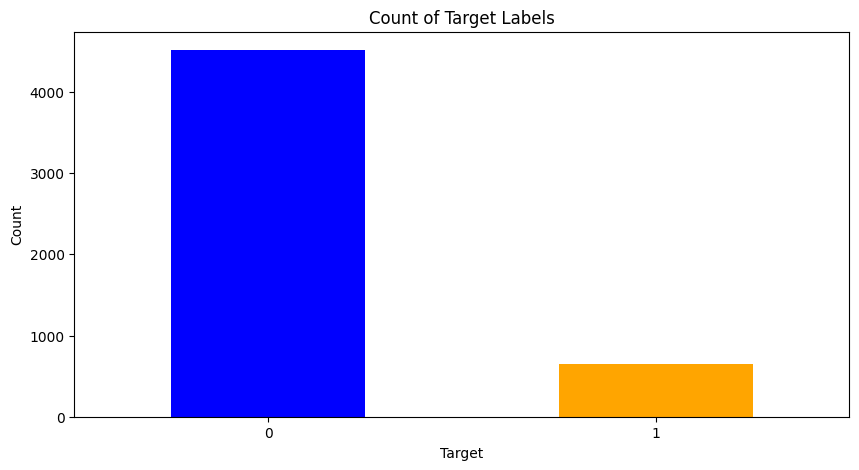

In [8]:
# Bar Chart
plt.figure(figsize=(10, 5))
Data['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Target Labels')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Unbalanced dataset-> OverSampling would be used to solve this issue

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

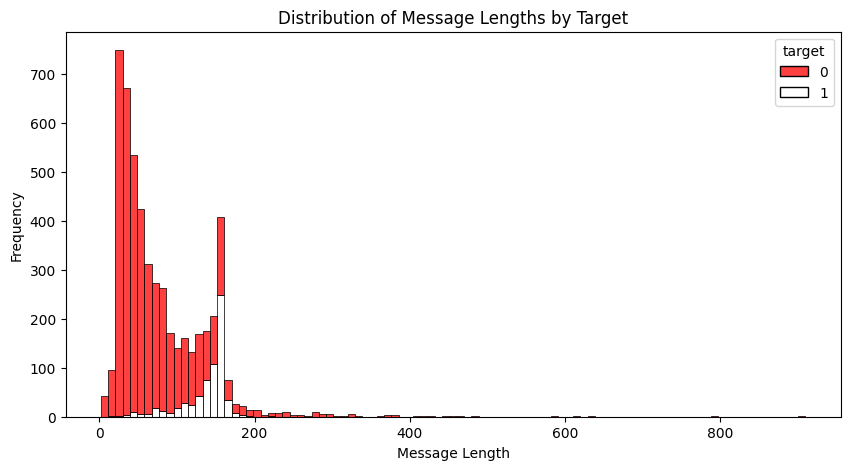

In [9]:
# Assuming we have a 'length' column representing the length of the messages
Data['length'] = Data['text'].apply(len)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=Data, x='length', hue='target', multiple='stack', palette=['red', 'white'])
plt.title('Distribution of Message Lengths by Target')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Feature Engineering
Data['sen_counts']  = Data.text.apply(lambda x: len(nltk.sent_tokenize(x)))
Data['word_counts'] = Data.text.apply(lambda x: len(nltk.word_tokenize(x)))

<Axes: >

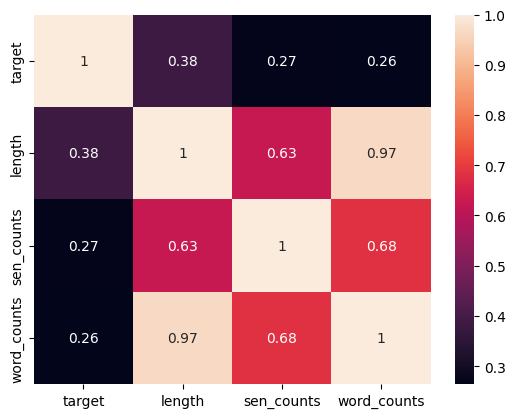

In [11]:
new_df= Data.drop(columns=['text'])
sns.heatmap(new_df.corr(),annot=True)

In [12]:
ps = PorterStemmer()
cv = CountVectorizer()

In [13]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [14]:
Data['transformed'] = Data['text'].apply(transform_text)
X = cv.fit_transform(Data['transformed']).toarray()
y = Data['target'].values

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the XGBClassifier
model = XGBClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 2)
}

# Set up RandomizedSearchCV
n_iter_search = 50  # Number of parameter settings sampled
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the randomized search to the data
start_time = time.time()
random_search.fit(X_train_res, y_train_res)
end_time = time.time()

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

# Print the time taken
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.7144176772591101, 'gamma': 0.47457286579569297, 'learning_rate': 0.2760041161894143, 'max_depth': 6, 'n_estimators': 187, 'reg_alpha': 0.6258599157142364, 'reg_lambda': 1.5062725171601754, 'subsample': 0.9569469523564966}
Best Score: 0.9114971050454921
Test Score: 0.8665377176015474
Time taken for RandomizedSearchCV: 842.71 seconds


In [16]:
y_pred=random_search.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8665377176015474
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.51      0.88      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034

